## 1 - Importing Libraries and Data Exploration

In [143]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from math import pi #Used in Radar Plots
import seaborn as sns
sns.set_style(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [144]:
fifa_20 = pd.read_csv("fifa-20.csv")
fifa_20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [145]:
# Shape of Data i.e. Number of Rows of Columns
print(f"Rows Count : {fifa_20.shape[0]}")
print(f"Columns Count : {fifa_20.shape[1]}")

Rows Count : 18278
Columns Count : 104


In [146]:
# List of all Columns in the Dataset
cols = fifa_20.columns.to_list()
print(cols)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

## 2 - Data Cleaning and Manipulation

In [147]:
# Dropping Some useless Columns
useless_columns = [
    'dob',
    'sofifa_id',
    'player_url',
    'long_name',
    'body_type',
    'real_face',
    'nation_position',
    'loaned_from',
    'nation_jersey_number']
fifa_20.drop(columns = useless_columns, inplace = True, axis = 1)

In [148]:
# Creating a new Column for BMI using existing Data
fifa_20["BMI"] = fifa_20.weight_kg / (fifa_20.height_cm / 100) ** 2
fifa_20[["short_name", "weight_kg", "height_cm", "BMI"]].head(10)

,short_name,weight_kg,height_cm,BMI
0,L. Messi,72,170,24.913495
1,Cristiano Ronaldo,83,187,23.735308
2,Neymar Jr,68,175,22.204082
3,J. Oblak,87,188,24.615211
4,E. Hazard,74,175,24.163265
5,K. De Bruyne,70,181,21.366869
6,M. ter Stegen,85,187,24.307244
7,V. van Dijk,92,193,24.698650
8,L. Modrić,66,172,22.309356
9,M. Salah,71,175,23.183673


In [149]:
# List of Players with their Position in Matches
fifa_20[['short_name','player_positions']].head(10)

,short_name,player_positions
0,L. Messi,"RW, CF, ST"
1,Cristiano Ronaldo,"ST, LW"
2,Neymar Jr,"LW, CAM"
3,J. Oblak,GK
4,E. Hazard,"LW, CF"
5,K. De Bruyne,"CAM, CM"
6,M. ter Stegen,GK
7,V. van Dijk,CB
8,L. Modrić,CM
9,M. Salah,"RW, ST"


In [150]:
# Creating Dummy Variables for each Position value and storing them
# Dummy Variables --> Similar to OneHotEncoding

new_player_position = fifa_20['player_positions'].str.get_dummies(sep=',').add_prefix('Position')
new_player_position.head(10)

,Position CAM,Position CB,Position CDM,Position CF,Position CM,Position LB,Position LM,Position LW,Position LWB,Position RB,Position RM,Position RW,Position RWB,Position ST,PositionCAM,PositionCB,PositionCDM,PositionCF,PositionCM,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [151]:
# Joining the New Player Position with the original dataset
fifa_20 = pd.concat([fifa_20, new_player_position], axis = 1)
fifa_20.drop('player_positions', axis=1, inplace=True)
fifa_20.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI,Position CAM,Position CB,Position CDM,Position CF,Position CM,Position LB,Position LM,Position LW,Position LWB,Position RB,Position RM,Position RW,Position RWB,Position ST,PositionCAM,PositionCB,PositionCDM,PositionCF,PositionCM,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,24.913495,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,23.735308,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,22.204082,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,164700000.0,NaN,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.615211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",8

In [152]:
columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']
fifa_20[columns].head(10)

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,69+3,69+3,69+3,67+3,69+3,69+3,69+3,67+3,69+3,69+3,69+3,69+3,74+3,74+3,74+3,69+3,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
8,77+3,77+3,77+3,84+3,83+3,83+3,83+3,84+3,86+3,86+3,86+3,85+3,87+3,87+3,87+3,85+3,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
9,84+3,84+3,84+3,88+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,87+3,81+3,81+3,81+3,87+3,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3


In [153]:
# Removing the part after + and Keeping only the first part
for col in columns:
    fifa_20[col] = fifa_20[col].str.split('+', n=1, expand = True)[0]

fifa_20[columns].head(10)

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61
5,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,69,69,69,67,69,69,69,67,69,69,69,69,74,74,74,69,79,83,83,83,79,81,87,87,87,81
8,77,77,77,84,83,83,83,84,86,86,86,85,87,87,87,85,81,81,81,81,81,79,72,72,72,79
9,84,84,84,88,88,88,88,88,87,87,87,87,81,81,81,87,70,67,67,67,70,66,57,57,57,66


In [154]:
# Filling the null values in above data with 0
fifa_20[columns] = fifa_20[columns].fillna(0)

# Converting the above columns to int type
fifa_20[columns] = fifa_20[columns].astype(int)

In [155]:
# Scores of Different Abilities Players are Good At
columns = ['dribbling', 'defending', 'physic', 'passing', 'shooting', 'pace']
fifa_20[columns].head(10)

,dribbling,defending,physic,passing,shooting,pace
0,96.0,39.0,66.0,92.0,92.0,87.0
1,89.0,35.0,78.0,82.0,93.0,90.0
2,95.0,32.0,58.0,87.0,85.0,91.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,94.0,35.0,66.0,86.0,83.0,91.0
5,86.0,61.0,78.0,92.0,86.0,76.0
6,NaN,NaN,NaN,NaN,NaN,NaN
7,71.0,90.0,86.0,70.0,60.0,77.0
8,89.0,72.0,66.0,89.0,76.0,74.0
9,89.0,45.0,74.0,81.0,86.0,93.0


In [156]:
# Count of null values in the above data
fifa_20[columns].isnull().sum()

dribbling    2036
defending    2036
physic       2036
passing      2036
shooting     2036
pace         2036
dtype: int64

In [157]:
# filling the null values in above data by the median of the respective columns
for col in columns:
    fifa_20[col] = fifa_20[col].fillna(fifa_20[col].median())
fifa_20[columns].head(10)

,dribbling,defending,physic,passing,shooting,pace
0,96.0,39.0,66.0,92.0,92.0,87.0
1,89.0,35.0,78.0,82.0,93.0,90.0
2,95.0,32.0,58.0,87.0,85.0,91.0
3,64.0,56.0,66.0,58.0,54.0,69.0
4,94.0,35.0,66.0,86.0,83.0,91.0
5,86.0,61.0,78.0,92.0,86.0,76.0
6,64.0,56.0,66.0,58.0,54.0,69.0
7,71.0,90.0,86.0,70.0,60.0,77.0
8,89.0,72.0,66.0,89.0,76.0,74.0
9,89.0,45.0,74.0,81.0,86.0,93.0


In [158]:
# filling other null values in data by 0
fifa_20 = fifa_20.fillna(0)
fifa_20.isnull().any().sum() # Verifying if all the columns are non-null or not
# should return 0 if all the columns are non-null

0

## 3 - Start with Analysis

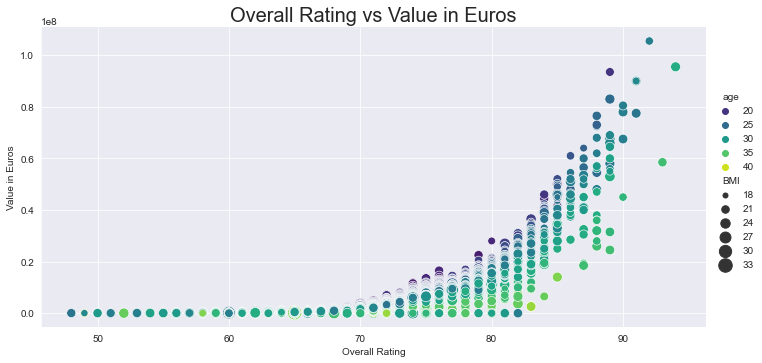

In [159]:
# Overall Rating vs Value of Player in Euro with Age and BMI Data
sns.relplot(x='overall', y='value_eur', hue='age', palette = 'viridis', size="BMI", sizes=(15, 200), aspect=2, data=fifa_20)
plt.title('Overall Rating vs Value in Euros', fontsize = 20)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()

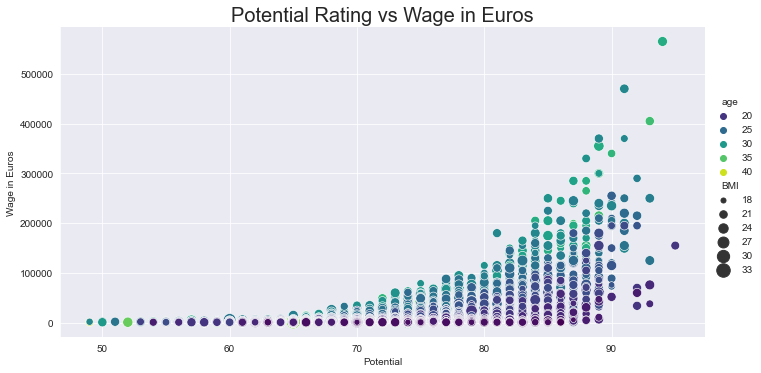

In [160]:
# Potential Rating vs Wage of Players in Euros with Age and BMI Data
sns.relplot(x='potential',y='wage_eur',hue='age',palette = 'viridis',size="BMI", sizes=(15, 200),aspect=2,data=fifa_20)
plt.title('Potential Rating vs Wage in Euros',fontsize = 20)
plt.xlabel('Potential')
plt.ylabel('Wage in Euros')
plt.show()

Left Preferred 4318
Right Preferred 13960 




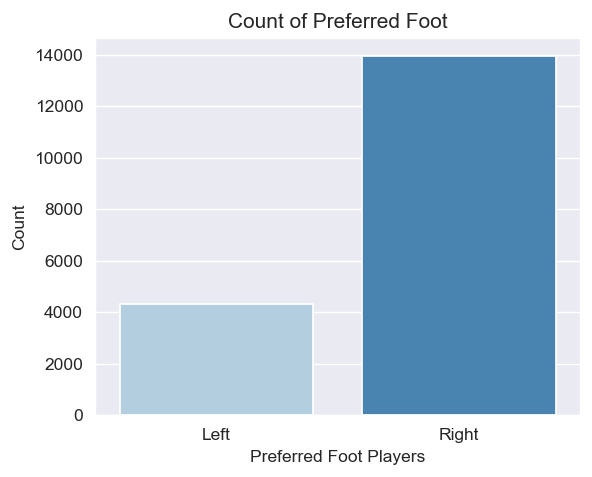

In [161]:
# Foot Prefered by Players
Right,Left = fifa_20.preferred_foot.value_counts()
print('Left Preferred',Left)
print('Right Preferred',Right, "\n\n")

plt.figure(dpi=125, figsize=(5, 4))
sns.countplot('preferred_foot',data=fifa_20,palette='Blues')
plt.xlabel('Preferred Foot Players')
plt.ylabel('Count')
plt.title('Count of Preferred Foot')
plt.show()

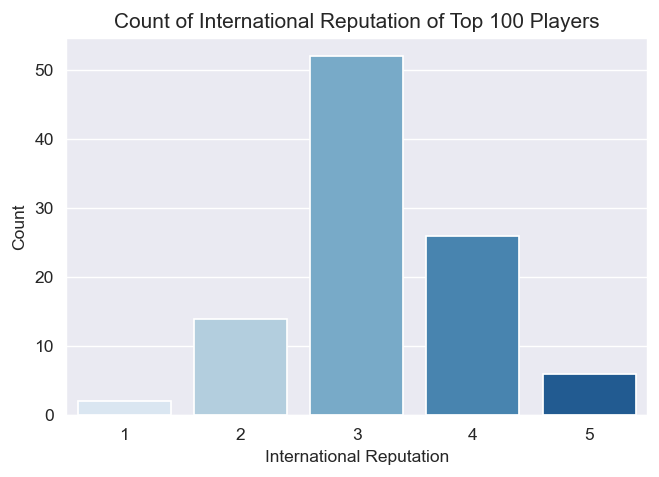

In [162]:
# Count of International Reputation of Players
plt.figure(dpi=125)
sns.countplot('international_reputation', data=fifa_20.head(100), palette='Blues')
plt.xlabel('International Reputation')
plt.ylabel('Count')
plt.title('Count of International Reputation of Top 100 Players')
plt.show()

Age Distribution
----------------------
count    18278.000000
mean        25.283291
std          4.656964
min         16.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         42.000000
Name: age, dtype: float64 




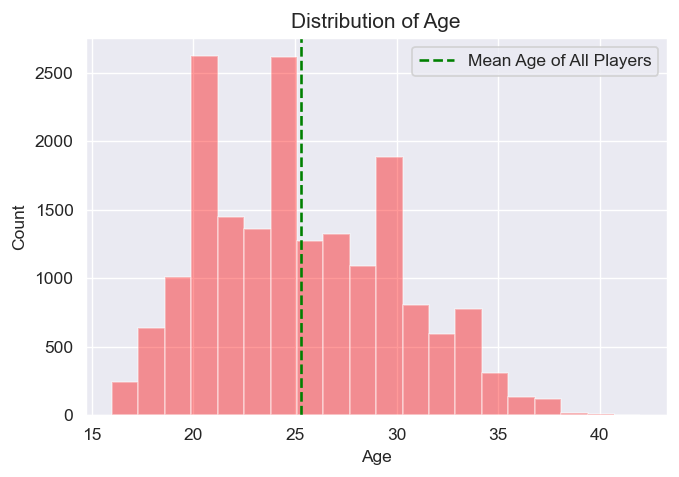

In [163]:
# Age Distribution of Players
print("Age Distribution")
print("-" * 22)
print(fifa_20.age.describe(), "\n\n")

plt.figure(dpi=125)
sns.distplot(a=fifa_20['age'], kde=False, bins=20, color='red')
plt.axvline(x=np.mean(fifa_20['age']), c='green', ls='--', label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

BMI Distribution
----------------------
count    18278.000000
mean        22.858347
std          1.366118
min         17.043303
25%         21.967858
50%         22.857143
75%         23.719609
max         34.717839
Name: BMI, dtype: float64 




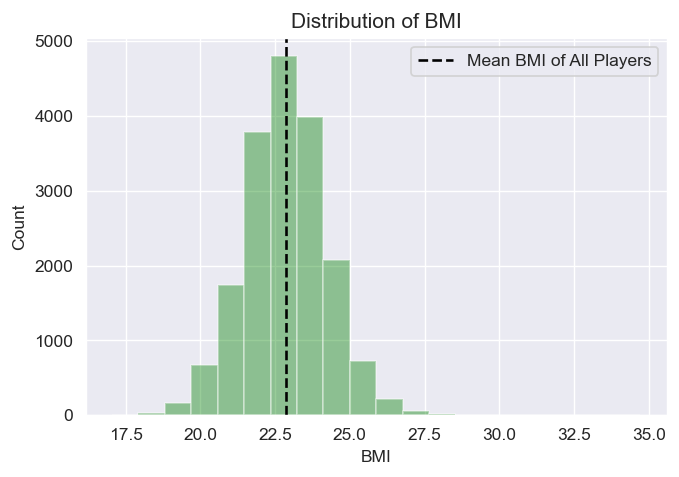

In [164]:
# BMI Distribution
print("BMI Distribution")
print("-" * 22)
print(fifa_20.BMI.describe(), "\n\n")

plt.figure(dpi=125)
sns.distplot(a=fifa_20['BMI'], kde=False, bins=20, color='green')
plt.axvline(x=np.mean(fifa_20['BMI']), c='black', ls='--', label='Mean BMI of All Players')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

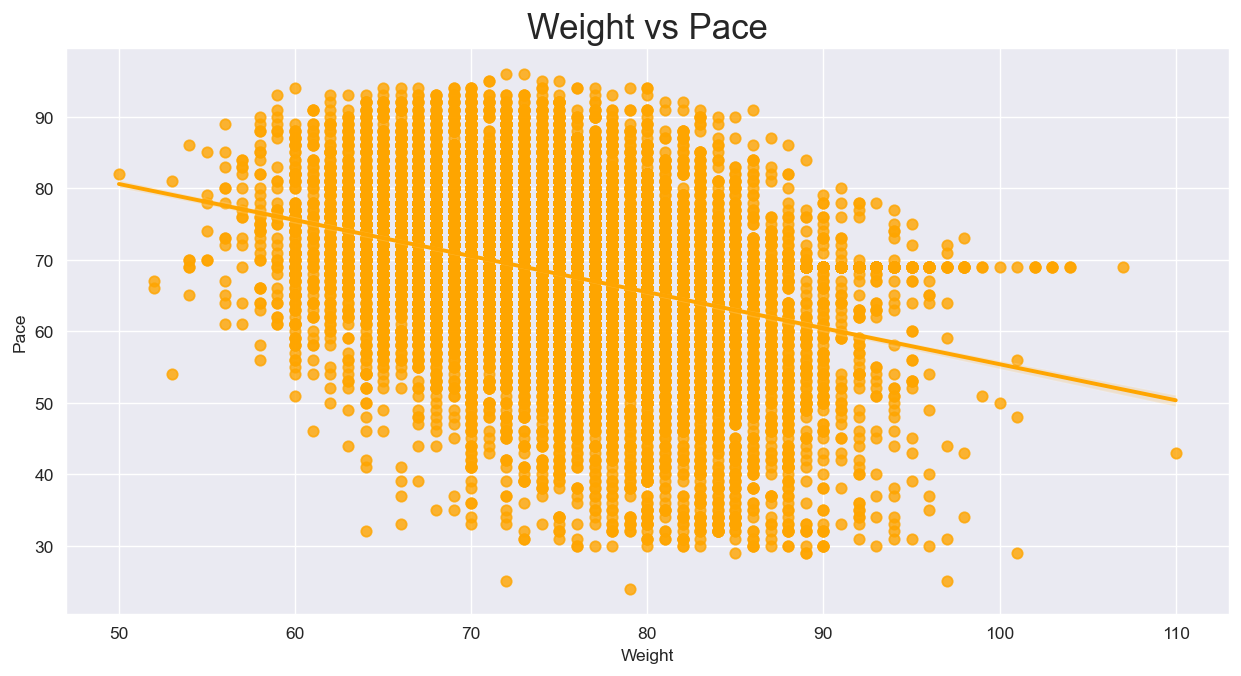

In [165]:
# Weight vs Pace Comparison
plt.figure(figsize=(12,6),dpi=125)
x=fifa_20['weight_kg']
y=fifa_20['pace']

sns.regplot(x,y,color='orange')
plt.title('Weight vs Pace',fontsize = 20)
plt.xlabel('Weight')
plt.ylabel('Pace')
plt.show()

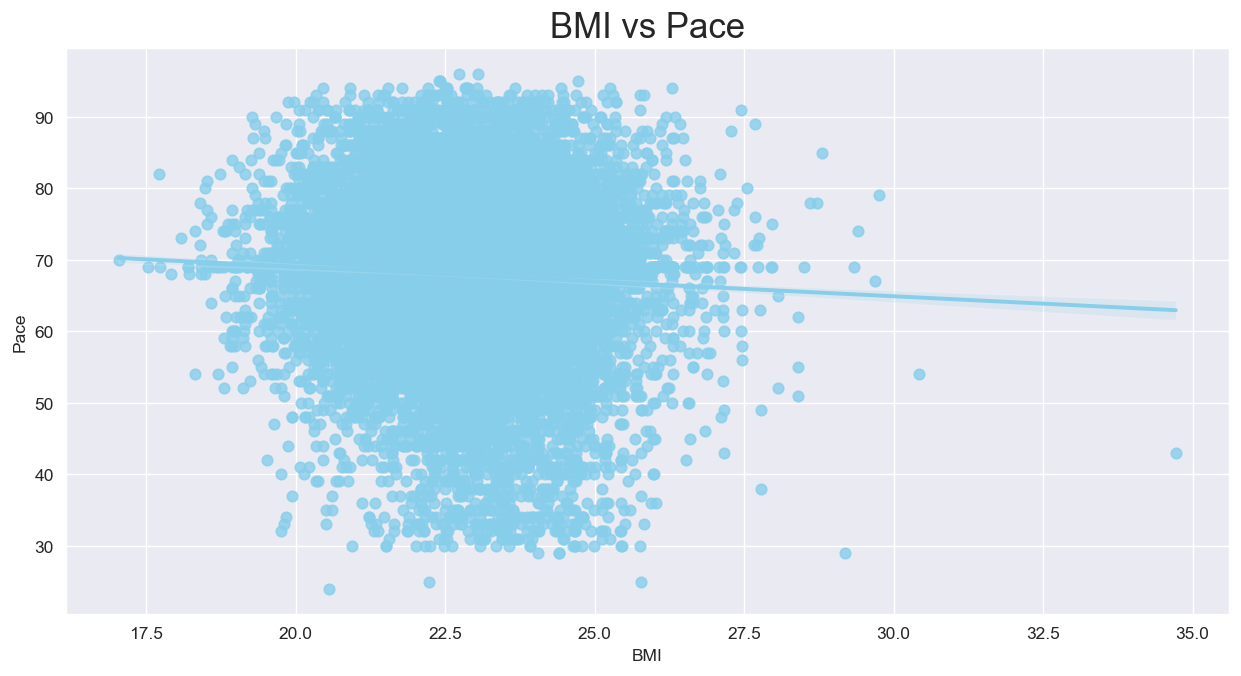

In [166]:
# BMI vs Pace Comparison
plt.figure(figsize=(12,6),dpi=125)
x=fifa_20['BMI']
y=fifa_20['pace']

sns.regplot(x,y,color='skyblue')
plt.title('BMI vs Pace',fontsize=20)
plt.xlabel('BMI')
plt.ylabel('Pace')
plt.show()

## 3.1 - Top 20 Analysis

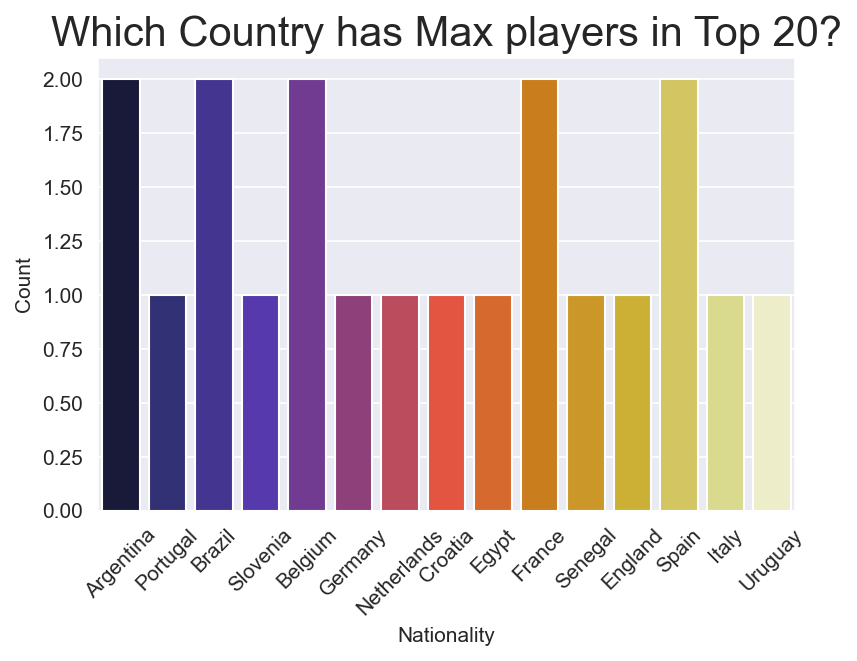

In [167]:
plt.figure(dpi=150)
sns.countplot(x='nationality',data=fifa_20.head(20),palette='CMRmap')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Country has Max players in Top 20?',fontsize = 20)
plt.show()

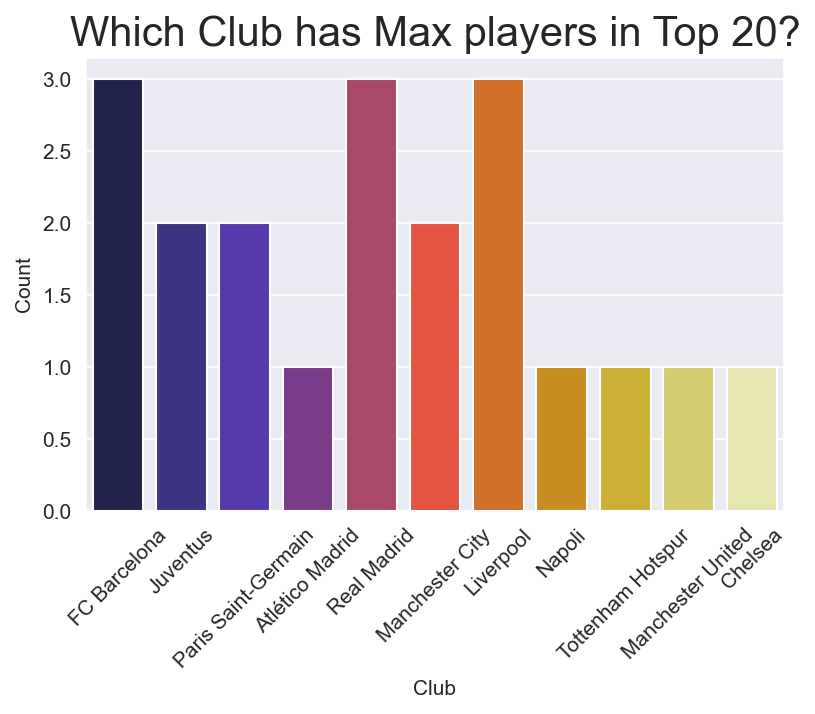

In [168]:
plt.figure(dpi=150)
sns.countplot('club',data=fifa_20.head(20),palette='CMRmap')
plt.xlabel('Club')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Club has Max players in Top 20?',fontsize = 20)
plt.show()

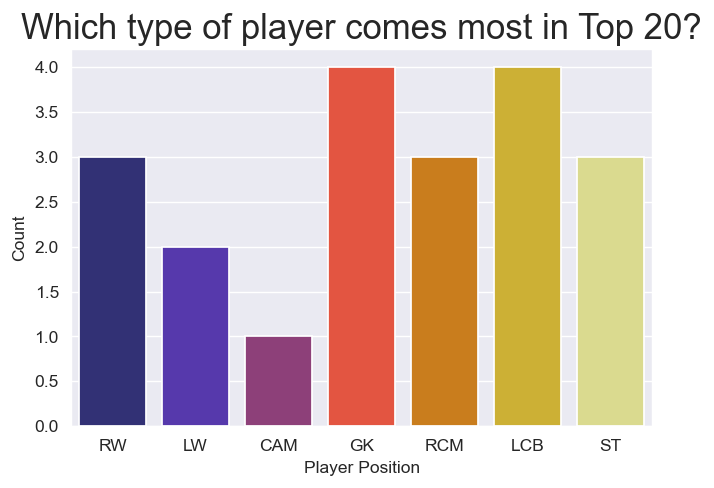

In [169]:
plt.figure(dpi=125)
sns.countplot('team_position',data=fifa_20.head(20),palette='CMRmap')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.title('Which type of player comes most in Top 20?',fontsize = 20)
plt.show()

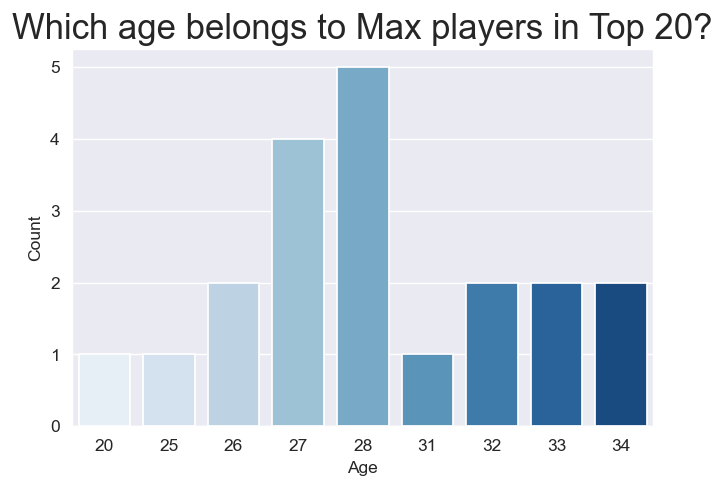

In [170]:
plt.figure(dpi=125)
sns.countplot('age',data=fifa_20.head(20),palette='Blues')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Which age belongs to Max players in Top 20?',fontsize = 20)
plt.show()

## 3.2 - The Biggest Rivalry - MESSI VS RONALDO

In [171]:
column_r=['short_name','potential','pace','shooting','passing','dribbling','defending','physic', 'overall']
rival = fifa_20.head(2)[column_r]
rival = rival.set_index('short_name')
rival.head()

,potential,pace,shooting,passing,dribbling,defending,physic,overall
short_name,,,,,,,,
L. Messi,94,87.0,92.0,92.0,96.0,39.0,66.0,94
Cristiano Ronaldo,93,90.0,93.0,82.0,89.0,35.0,78.0,93


In [172]:
values = rival.iloc[0].tolist()
values += values [:1]
print(values)

values2 = rival.iloc[1].tolist()
values2 += values2[:1]
print(values2)

[94.0, 87.0, 92.0, 92.0, 96.0, 39.0, 66.0, 94.0, 94.0]
[93.0, 90.0, 93.0, 82.0, 89.0, 35.0, 78.0, 93.0, 93.0]


In [173]:
# Custom Code for Radar Chart
def RadarChart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    
    plt.figure(dpi=125, figsize=(6, 4))
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,values)
    ax.fill(angles, values, 'steelblue', alpha=0.1)

    ax.plot(angles2,values2)
    ax.fill(angles2, values2, 'darkorange', alpha=0.1)

    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

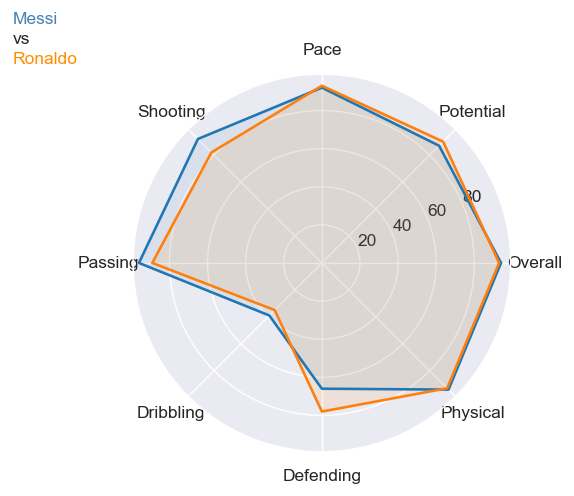

In [174]:
RadarChart(
    "Messi", rival.iloc[0].tolist(),
    "Ronaldo", rival.iloc[1].tolist()
)

## 3.3 - Some Other Top Comparisons

In [175]:
column_r=['short_name','age','team_position','overall','potential','pace','shooting','passing','dribbling','defending','physic']
riv = fifa_20[column_r]
riv = riv.set_index(['short_name','team_position','age'])

In [176]:
value = riv.iloc[5].tolist()
value += value[:1]
print(value)

value2 = riv.iloc[8].tolist()
value2 += value2[:1]
print(value2)

[91.0, 91.0, 76.0, 86.0, 92.0, 86.0, 61.0, 78.0, 91.0]
[90.0, 90.0, 74.0, 76.0, 89.0, 89.0, 72.0, 66.0, 90.0]


In [177]:
def Radarchart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,value)
    ax.fill(angles, value, 'teal', alpha=0.1)

    ax.plot(angles2,value2)
    ax.fill(angles2, value2, 'red', alpha=0.1)
    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

### Comparing Top Two Midfielders as per the Dataset i.e De Bryne and Modric

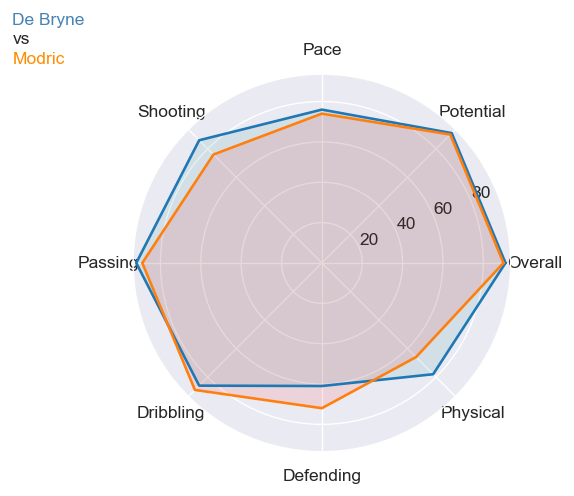

In [178]:
Radarchart(
    "De Bryne",[91.0, 91.0, 76.0, 86.0, 92.0, 86.0, 61.0, 78.0, 91.0],
    "Modric",[90.0, 90.0, 74.0, 76.0, 89.0, 89.0, 72.0, 66.0, 90.0])

### Comparing Top Two Defenders of 2020 i.e Ramos and Van Dijk

In [179]:
value = riv.iloc[18].tolist()
value += value[:1]
value

[89.0, 89.0, 72.0, 68.0, 75.0, 73.0, 87.0, 85.0, 89.0]

In [180]:
value2 = riv.iloc[7].tolist()
value2 += value2[:1]
value2

[90.0, 91.0, 77.0, 60.0, 70.0, 71.0, 90.0, 86.0, 90.0]

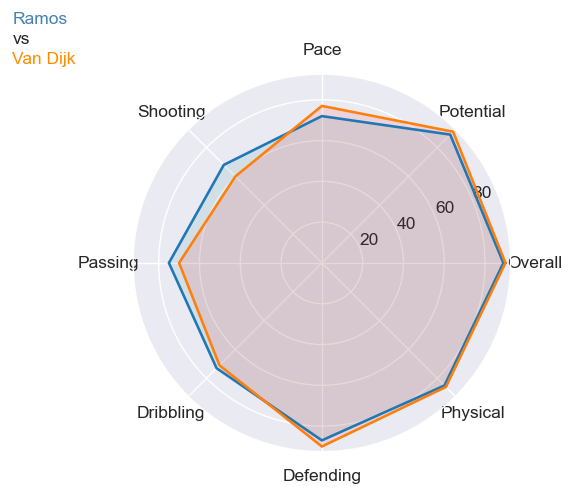

In [181]:
Radarchart(
    "Ramos",[89.0, 89.0, 72.0, 68.0, 75.0, 73.0, 87.0, 85.0, 89.0],
    "Van Dijk",[90.0, 91.0, 77.0, 60.0, 70.0, 71.0, 90.0, 86.0, 90.0])

### Comparing Top Two Strikers as per the Dataset i.e Kane and Aguero

In [182]:
value = riv.iloc[12].tolist()
value += value[:1]
value

[89.0, 91.0, 70.0, 91.0, 79.0, 81.0, 47.0, 83.0, 89.0]

In [183]:
value2 = riv.iloc[17].tolist()
value2 += value2[:1]
value2

[89.0, 89.0, 80.0, 90.0, 77.0, 88.0, 33.0, 74.0, 89.0]

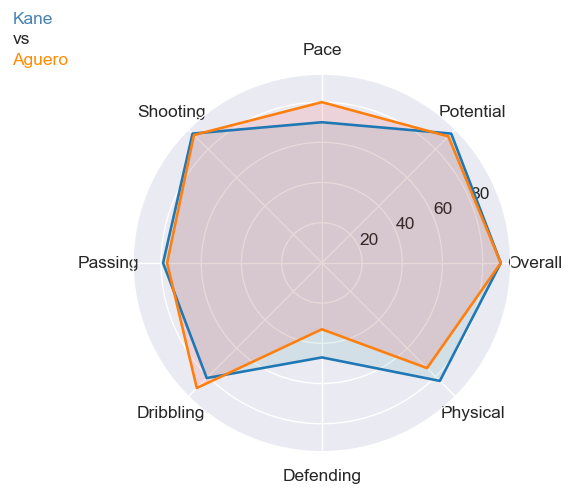

In [184]:
Radarchart(
    "Kane",[89.0, 91.0, 70.0, 91.0, 79.0, 81.0, 47.0, 83.0, 89.0],
    "Aguero",[89.0, 89.0, 80.0, 90.0, 77.0, 88.0, 33.0, 74.0, 89.0])